# Homework
Note: sometimes your answer doesn't match one of the options exactly. That's fine. Select the option that's closest to your solution.

### Dataset
In this homework, we will use the Car price dataset. Download it from here.

Or you can do it with wget:

`wget https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-02-car-price/data.csv`
We'll keep working with the MSRP variable, and we'll transform it to a classification task.

### Features
For the rest of the homework, you'll need to use only these columns:

* `Make`,
* `Model`,
* `Year`,
* `Engine HP`,
* `Engine Cylinders`,
* `Transmission Type`,
* `Vehicle Style`,
* `highway MPG`,
* `city mpg`

### Data preparation
* Select only the features from above and transform their names using next line:
`data.columns = data.columns.str.replace(' ', '_').str.lower()`
* Fill in the missing values of the selected features with 0.
* Rename MSRP variable to price.

In [23]:
# import libraries
import pandas as pd
import numpy as np

import seaborn as sns # for visualization
from matplotlib import pyplot as plt
%matplotlib inline

In [24]:
# get the data
data_link = 'https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-02-car-price/data.csv'

In [25]:
!wget $data_link

--2023-10-02 21:47:55--  https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-02-car-price/data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1475504 (1.4M) [text/plain]
Saving to: 'data.csv.1'

data.csv.1          100%[===================>]   1.41M  --.-KB/s    in 0.1s    

2023-10-02 21:47:56 (12.1 MB/s) - 'data.csv.1' saved [1475504/1475504]



In [26]:
# load data set 
data = pd.read_csv('data.csv')
data.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [34]:
columns = [
    'Make', 'Model', 'Year', 
    'Engine HP', 'Engine Cylinders', 
    'Transmission Type', 'Vehicle Style', 'highway MPG', 'city mpg', 'MSRP']

In [35]:
df = data[columns]

In [36]:
df.columns = df.columns.str.replace(' ', '_').str.lower()

In [37]:
df.head()

,make,model,year,engine_hp,engine_cylinders,transmission_type,vehicle_style,highway_mpg,city_mpg,msrp
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,Coupe,26,19,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,Convertible,28,19,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,Coupe,28,20,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,Coupe,28,18,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,Convertible,28,18,34500


In [38]:
df.isna().sum()

make                  0
model                 0
year                  0
engine_hp            69
engine_cylinders     30
transmission_type     0
vehicle_style         0
highway_mpg           0
city_mpg              0
msrp                  0
dtype: int64

In [39]:
df = df.copy().fillna(0)

In [40]:
df.isna().sum()

make                 0
model                0
year                 0
engine_hp            0
engine_cylinders     0
transmission_type    0
vehicle_style        0
highway_mpg          0
city_mpg             0
msrp                 0
dtype: int64

In [42]:
df = df.rename(columns = {'msrp': 'price'})

In [43]:
df.head()

,make,model,year,engine_hp,engine_cylinders,transmission_type,vehicle_style,highway_mpg,city_mpg,price
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,Coupe,26,19,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,Convertible,28,19,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,Coupe,28,20,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,Coupe,28,18,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,Convertible,28,18,34500


In [132]:
f = list(df.columns)
f

['make',
 'model',
 'year',
 'engine_hp',
 'engine_cylinders',
 'transmission_type',
 'vehicle_style',
 'highway_mpg',
 'city_mpg',
 'price']

### Question 1
What is the most frequent observation (mode) for the column transmission_type?

* `AUTOMATIC` (*)
* `MANUAL`
* `AUTOMATED_MANUAL`
* `DIRECT_DRIVE`

In [44]:
df.transmission_type.value_counts()

AUTOMATIC           8266
MANUAL              2935
AUTOMATED_MANUAL     626
DIRECT_DRIVE          68
UNKNOWN               19
Name: transmission_type, dtype: int64

### Question 2
Create the correlation matrix for the numerical features of your dataset. In a correlation matrix, you compute the correlation coefficient between every pair of features in the dataset.

What are the two features that have the biggest correlation in this dataset?

* `engine_hp` and `year`
* `engine_hp` and `engine_cylinders`
* `highway_mpg` and `engine_cylinders`
* `highway_mpg` and `city_mpg` (*)

In [45]:
num_features = ['year', 'engine_hp', 'engine_cylinders', 'highway_mpg', 'city_mpg']

In [48]:
# automaticly select numeric features
nf = list(df.dtypes[df.dtypes !='object'].index)
print(nf)

['year', 'engine_hp', 'engine_cylinders', 'highway_mpg', 'city_mpg', 'price']


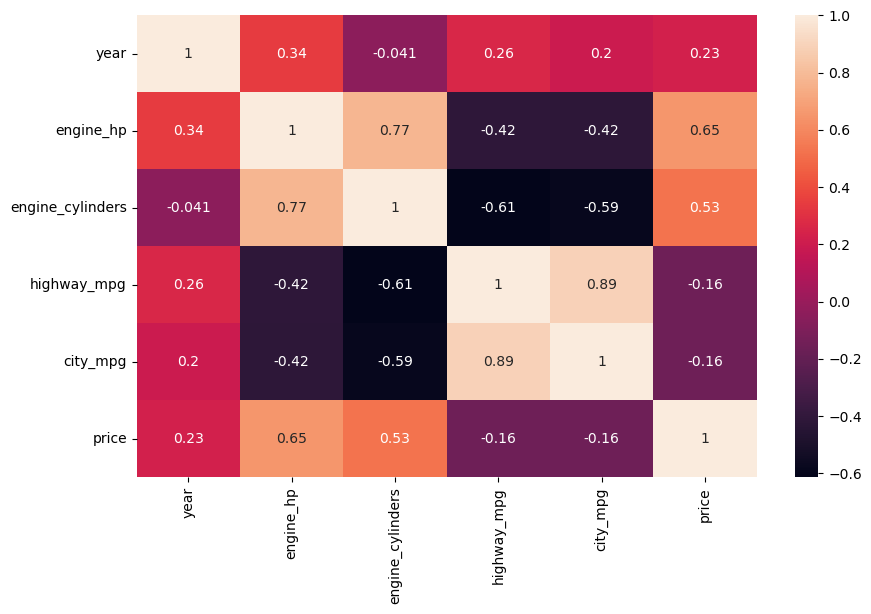

In [49]:
df_num = pd.DataFrame(df,columns=num_features)
fig, ax = plt.subplots(figsize=(10, 6))
corrMatrix = df.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

### Make price binary
* Now we need to turn the `price` variable from numeric into a binary format.
* Let's create a variable `above_average` which is `1` if the `price` is above its mean value and `0` otherwise.

In [50]:
price_mean = df.price.mean()
price_mean

40594.737032063116

In [51]:
above_average = (df.price > price_mean).astype(int)

In [53]:
df.price = above_average

In [54]:
df.head()

,make,model,year,engine_hp,engine_cylinders,transmission_type,vehicle_style,highway_mpg,city_mpg,price
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,Coupe,26,19,1
1,BMW,1 Series,2011,300.0,6.0,MANUAL,Convertible,28,19,1
2,BMW,1 Series,2011,300.0,6.0,MANUAL,Coupe,28,20,0
3,BMW,1 Series,2011,230.0,6.0,MANUAL,Coupe,28,18,0
4,BMW,1 Series,2011,230.0,6.0,MANUAL,Convertible,28,18,0


### Split the data
* Split your data in train/val/test sets with 60%/20%/20% distribution.
* Use Scikit-Learn for that (the `train_test_split` function) and set the seed to `42`.
* Make sure that the target value (`price`) is not in your dataframe.

In [57]:
from sklearn.model_selection import train_test_split

In [61]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=42)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=42)

df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

y_train = df_train.price
y_val = df_val.price
y_test = df_test.price

del df_train['price']
del df_val['price']
del df_test['price']

In [62]:
df_train.head()

,make,model,year,engine_hp,engine_cylinders,transmission_type,vehicle_style,highway_mpg,city_mpg
0,Mitsubishi,Endeavor,2011,225.0,6.0,AUTOMATIC,4dr SUV,19,15
1,Kia,Borrego,2009,276.0,6.0,AUTOMATIC,4dr SUV,21,17
2,Lamborghini,Gallardo,2012,570.0,10.0,MANUAL,Convertible,20,12
3,Chevrolet,Colorado,2016,200.0,4.0,AUTOMATIC,Crew Cab Pickup,27,20
4,Pontiac,Vibe,2009,158.0,4.0,AUTOMATIC,4dr Hatchback,26,20


In [63]:
y_train[:5]

0    0
1    0
2    1
3    0
4    0
Name: price, dtype: int64

### Question 3
* Calculate the mutual information score between above_average and other categorical variables in our dataset. Use the training set only.
* Round the scores to 2 decimals using round(score, 2).
Which of these variables has the lowest mutual information score?

* `make`
* `model`
* `transmission_type` (*)
* `vehicle_style`

In [66]:
from sklearn.metrics import mutual_info_score

In [67]:
cat_features = list(df_train.dtypes[df_train.dtypes =='object'].index)
cat_features

['make', 'model', 'transmission_type', 'vehicle_style']

In [71]:
for c in cat_features:
    print(c)
    print(round(mutual_info_score(df_train[c], y_train), 2))
    print('----')
    print()

make
0.24
----

model
0.46
----

transmission_type
0.02
----

vehicle_style
0.08
----



In [77]:
def mutual_info_price(series):
    return round(mutual_info_score(series, y_train), 2)

In [78]:
mut_inf = df_train[cat_features].apply(mutual_info_price)
mut_inf.sort_values(ascending=True)

transmission_type    0.02
vehicle_style        0.08
make                 0.24
model                0.46
dtype: float64

### Question 4
* Now let's train a logistic regression.
* Remember that we have several categorical variables in the dataset. Include them using one-hot encoding.
* Fit the model on the training dataset.
** To make sure the results are reproducible across different versions of Scikit-Learn, fit the model with these parameters:
** `model = LogisticRegression(solver='liblinear', C=10, max_iter=1000, random_state=42)`
* Calculate the accuracy on the validation dataset and round it to 2 decimal digits.
What accuracy did you get?

* 0.60
* 0.72
* 0.84
* 0.95 (*)

In [84]:
from sklearn.feature_extraction import DictVectorizer

In [81]:
train_dicts = df_train[cat_features + num_features].to_dict(orient='records')

In [82]:
train_dicts[0]

{'make': 'Mitsubishi',
 'model': 'Endeavor',
 'transmission_type': 'AUTOMATIC',
 'vehicle_style': '4dr SUV',
 'year': 2011,
 'engine_hp': 225.0,
 'engine_cylinders': 6.0,
 'highway_mpg': 19,
 'city_mpg': 15}

In [85]:
dv = DictVectorizer(sparse=False)

In [86]:
dv.fit(train_dicts)

DictVectorizer(sparse=False)

In [115]:
dv.get_feature_names_out()

array(['city_mpg', 'engine_cylinders', 'engine_hp', 'highway_mpg',
       'make=Acura', 'make=Alfa Romeo', 'make=Aston Martin', 'make=Audi',
       'make=BMW', 'make=Bentley', 'make=Bugatti', 'make=Buick',
       'make=Cadillac', 'make=Chevrolet', 'make=Chrysler', 'make=Dodge',
       'make=FIAT', 'make=Ferrari', 'make=Ford', 'make=GMC',
       'make=Genesis', 'make=HUMMER', 'make=Honda', 'make=Hyundai',
       'make=Infiniti', 'make=Kia', 'make=Lamborghini', 'make=Land Rover',
       'make=Lexus', 'make=Lincoln', 'make=Lotus', 'make=Maserati',
       'make=Maybach', 'make=Mazda', 'make=McLaren', 'make=Mercedes-Benz',
       'make=Mitsubishi', 'make=Nissan', 'make=Oldsmobile',
       'make=Plymouth', 'make=Pontiac', 'make=Porsche',
       'make=Rolls-Royce', 'make=Saab', 'make=Scion', 'make=Spyker',
       'make=Subaru', 'make=Suzuki', 'make=Tesla', 'make=Toyota',
       'make=Volkswagen', 'make=Volvo', 'model=1 Series', 'model=100',
       'model=124 Spider', 'model=190-Class', 'model

In [89]:
X_train = dv.fit_transform(train_dicts)

In [90]:
X_train.shape

(7148, 943)

In [91]:
val_dicts = df_val[cat_features + num_features].to_dict(orient='records')

In [92]:
X_val = dv.transform(val_dicts)

In [93]:
X_val.shape

(2383, 943)

In [94]:
test_dicts = df_test[cat_features + num_features].to_dict(orient='records')
X_test = dv.transform(test_dicts)

In [95]:
X_test.shape

(2383, 943)

In [96]:
#let let's train Logistic Regression
from sklearn.linear_model import LogisticRegression

In [97]:
model = LogisticRegression(solver='liblinear', C=10, max_iter=1000, random_state=42)
model.fit(X_train, y_train)

LogisticRegression(C=10, max_iter=1000, random_state=42, solver='liblinear')

In [98]:
model.coef_

array([[ 4.86054814e-02,  1.00098644e-02,  3.28265488e-02,
         4.43441928e-02,  1.05608228e+00,  6.25674521e-01,
         2.39540732e-01,  2.20221019e+00,  1.89632136e+00,
         8.30128252e-02,  3.50844061e-08, -4.02712412e-01,
         1.86626964e+00, -1.48231172e+00, -1.24449281e+00,
        -2.87131583e+00, -2.02838390e-01,  1.41601032e-01,
        -1.36744126e+00, -8.46493478e-01,  1.77990866e-01,
         1.83474221e-03, -1.21176628e+00, -2.06695965e+00,
         2.72851176e-01, -1.45430017e+00,  3.91551473e-03,
         1.83965796e+00,  1.18137429e+00,  1.10501514e+00,
         2.35198909e+00,  4.25976633e-01,  1.84719541e-03,
        -1.10029030e+00,  1.40581643e-04,  1.17480627e+00,
        -9.46649227e-01, -8.04677256e-01, -5.84220754e-01,
        -4.82685620e-02, -1.63677088e+00,  1.46647670e+00,
         3.56726450e-01,  9.86045664e-01, -1.02011021e-01,
         1.12404879e-01, -1.56995016e+00, -1.02451248e+00,
         1.59132099e+00, -5.59075934e-01, -5.58773063e-0

In [99]:
model.intercept_[0]

-0.08919319779743098

In [100]:
model.predict(X_train)

array([0, 0, 1, ..., 0, 0, 1])

In [101]:
# probability of price more than overage
model. predict_proba(X_train)

array([[9.59086643e-01, 4.09133569e-02],
       [8.98441685e-01, 1.01558315e-01],
       [1.08074782e-04, 9.99891925e-01],
       ...,
       [9.53389405e-01, 4.66105951e-02],
       [9.99548536e-01, 4.51464453e-04],
       [4.39461347e-01, 5.60538653e-01]])

In [102]:
# let's get predictions on validation dataset
y_pred_val = model.predict_proba(X_val)[:, 1]
y_pred_val

array([0.00873386, 0.99033286, 0.00157436, ..., 0.00145955, 0.97179501,
       0.96248245])

In [103]:
higher_price = (y_pred_val >= 0.5)

In [104]:
higher_price.astype(int)

array([0, 1, 0, ..., 0, 1, 1])

In [108]:
# check the accuracy on the validation dataset
acc_val = (y_val == higher_price).mean()

In [109]:
print(round(acc_val, 2))

0.93


### Question 5
* Let's find the least useful feature using the feature elimination technique.
* Train a model with all these features (using the same parameters as in Q4).
* Now exclude each feature from this set and train a model without it. Record the accuracy for each model.
* For each feature, calculate the difference between the original accuracy and the accuracy without the feature.
Which of following feature has the smallest difference?

* `year`
* `engine_hp`
* `transmission_type`
* `city_mpg`
Note: the difference doesn't have to be positive

In [116]:
#train the model and try to find less useful feature
model = LogisticRegression(solver='liblinear', C=10, max_iter=1000, random_state=42)
model.fit(X_train, y_train)

LogisticRegression(C=10, max_iter=1000, random_state=42, solver='liblinear')

In [117]:
#import accuracy
from sklearn.metrics import accuracy_score

In [120]:
y_predv = model.predict(X_val)
score_fullset = accuracy_score(y_val,y_predv)
score_fullset

0.9345362987830466

In [135]:
# model without year
f1 = ['make',
 'model',
 'engine_hp',
 'engine_cylinders',
 'transmission_type',
 'vehicle_style',
 'highway_mpg',
 'city_mpg',
 'price']
train_dictsy = df_train[f1].to_dict(orient='records')

KeyError: "['price'] not in index"

In [ ]:
# model withiut engine_hp

In [ ]:
# model without transmission_type

In [ ]:
# model without city_mpg

In [122]:
def feature_importance(features_for_train):
    df_features = df[features_for_train]
    df_train_full_leaveone, df_test_leaveone = train_test_split(df_features, test_size=0.2, random_state=42)
    df_train_leaveone, df_val_leaveone = train_test_split(df_features, test_size=0.25, random_state=42)
    del df_train_leaveone['price']
    del df_val_leaveone['price']
    del df_test_leaveone['price']
    X_train = df_train_leaveone.values
    X_val = df_val_leaveone.values
    X_test = df_test_leave.values
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)

    score = accuracy_score(y_val,y_pred)
    return score

In [ ]:
features_list = []

In [ ]:
for f in ['year', 'engine_hp', 'transmission_type', 'city_mpg']:
    df_
    del df

### Question 6
* For this question, we'll see how to use a linear regression model from Scikit-Learn.
* We'll need to use the original column price. Apply the logarithmic transformation to this column.
* Fit the Ridge regression model on the training data with a solver 'sag'. Set the seed to 42.
* This model also has a parameter alpha. Let's try the following values: [0, 0.01, 0.1, 1, 10].
* Round your RMSE scores to 3 decimal digits.
Which of these alphas leads to the best RMSE on the validation set?

* 0
* 0.01
* 0.1
* 1
* 10
Note: If there are multiple options, select the smallest `alpha`.

